# FoodHub Data Analysis



### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

###  How many rows and columns are present in the data? 

In [4]:
print("The data has {} rows and {} columns".format(df.shape[0], df.shape[1]))
df.shape

The data has 1898 rows and 9 columns


(1898, 9)

#### Observations:
Dataset consists of 1898 rows and 9 columns



###  What are the datatypes of the different columns in the dataset? 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
I. The column 'Rating' is stated as an object rather than a float or int64

II. No null counts or missing values for each column

###  Are there any missing values in the data? If yes, treat them using an appropriate method.

In [6]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
With respect to the data , No missing values were found.

###  Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? 

In [7]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:
I. Range includes between 20-35 minutes

II. Food preparation which is the time preparing once the order is set measured in minutes out of 20 minutes, gives an average of 27 minutes and 04 seconds with a maximum of 35 minutes.

###  How many orders are not rated? 

In [8]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
From 1898 orders, 736 does not containg rating illustrated by Not given.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

###  Explore all the variables and provide observations on their distributions. 

In [9]:
df.nunique()

order_id                 1898
customer_id              1200
restaurant_name           178
cuisine_type               14
cost_of_the_order         312
day_of_the_week             2
rating                      4
food_preparation_time      16
delivery_time              19
dtype: int64

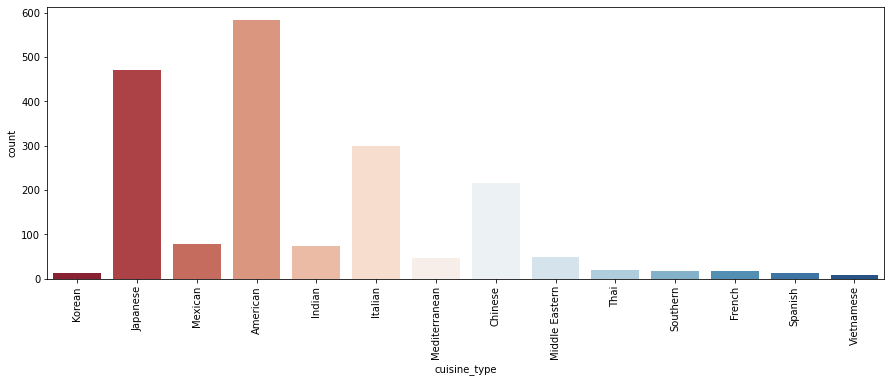

In [10]:
#Further analysis a.
#Cuisine Type
# American is the most preferred / favorite cuisine ordered through FoodHub
#The preferred order is American > Japanese > Italian > Chinese
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.countplot(data=df, x='cuisine_type', palette="RdBu");

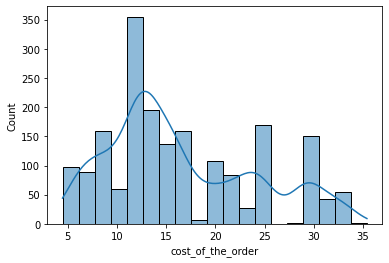

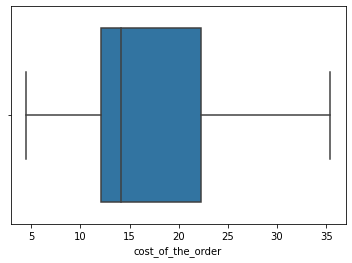

In [11]:
#Further analysis b.
#Cost of the order
#Cost of the order varies from $5 to $35
# There are no outliers in cost of orders
# 50% of the orders are less than 15$
sns.histplot(data = df, x = 'cost_of_the_order', kde=True)
plt.show()
sns.boxplot(data=df, x='cost_of_the_order')
plt.show()

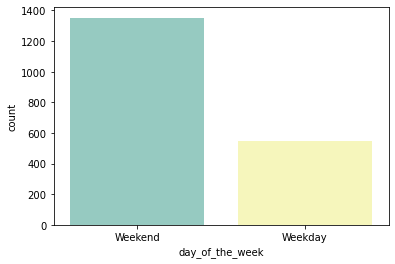

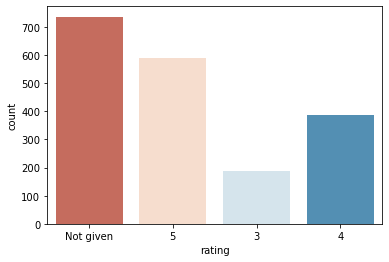

In [12]:
#Further analysis c.
#Day of the week
#Order by customers on Weekends are 2 times higher than Weekdays
#A lot of orders are made during the Weekend
sns.countplot(data=df, x='day_of_the_week', palette = "Set3");
plt.show()
#Rating
#Excluding 'Not given', majority of the orders are rated 5 out of 5 points
sns.countplot(data=df, x='rating', palette="RdBu")
plt.show()

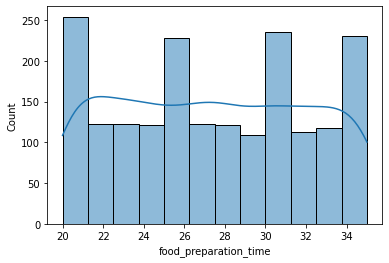

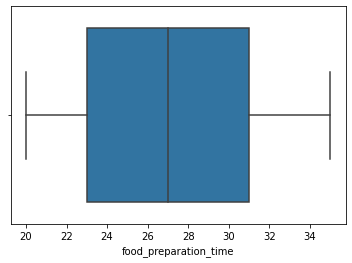

In [13]:
#Further analysis d.
# Food preparation time
# food prep time ranges from 20~35
# There are no outliers for food preparation time
# 50% of the food preparation time values are less than 27 minutes
sns.histplot(data = df, x = 'food_preparation_time', kde=True)
plt.show()
sns.boxplot(data=df, x='food_preparation_time')
plt.show()

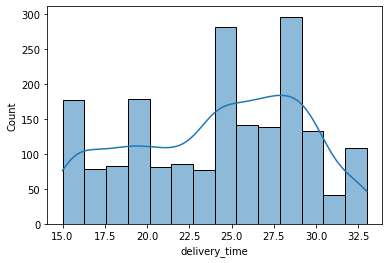

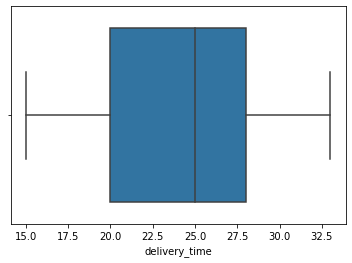

In [14]:
#Further analysis e.
# Delivery time
# delivery time ranges from 15.0~32.5
# There are no outliers for delivery time
# 50% of the delivery time values are less than 25.0 minutes
sns.histplot(data = df, x = 'delivery_time', kde=True)
plt.show()
sns.boxplot(data=df, x='delivery_time')
plt.show()

###  Which are the top 5 restaurants in terms of the number of orders received? 

In [15]:
#Top 5 restaurants in terms of the number of orders received:
# Shake Shack, Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, Parm 
top_5_rest = df['restaurant_name'].value_counts().sort_values(ascending=False)
top_5_rest.head(5)


Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
The top 5 restaurants in terms of the number of orders received are:

1.Shake Shack

2.Meatball Shop

3.Blue Ribbon Sushi

4.Blue Ribbon Fried Chicken

5.Parm

###  Which is the most popular cuisine on weekends? 

In [16]:
df[df['day_of_the_week'] == "Weekend"]['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

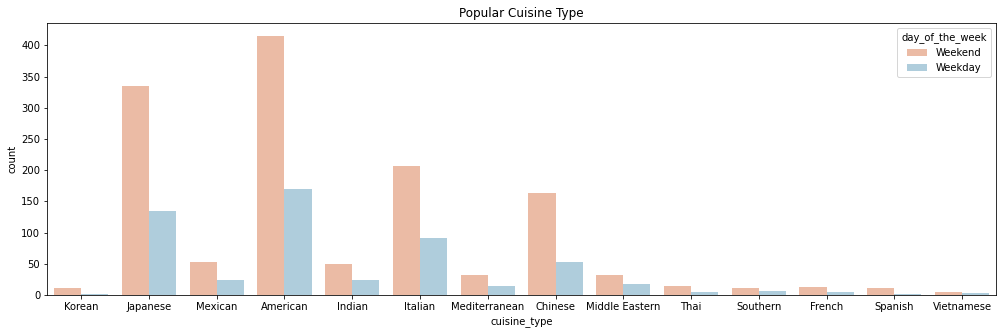

In [17]:
plt.figure(figsize=(17,5))
sns.countplot(data = df, x = 'cuisine_type', hue = 'day_of_the_week', palette = "RdBu")
plt.title("Popular Cuisine Type");

#### Observations:
I. The most popular cuisin on weekdays is also 'American'

II. The most popular cuisine on weekends is 'American'

###  What percentage of the orders cost more than 20 dollars? 

In [18]:
# 555 of the orders cost more than 20 dollars
greater_than_20 = df[df['cost_of_the_order']>20]
greater_than_20.shape[0]

# 29.2 percentage of the orders cost more than 20 dollars
percentage = round((greater_than_20.shape[0]/1898) * 100, 1)
print(percentage, "%")

29.2 %


#### Observations:
From 1898 orders, 555 which is equivalet to 29.2% of the orders cost more than 20 dollars

###  What is the mean order delivery time? 

In [19]:
round(df['delivery_time'].mean(), 2)

24.16

#### Observations:
The mean order delivery time is 24 minutes and 16 seconds.

###  The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [20]:
frequent_customer = df['customer_id'].value_counts().sort_values(ascending=False)
frequent_customer.head().reset_index()


#Top 5 most frequenst customers are:

,index,customer_id
0,52832,13
1,47440,10
2,83287,9
3,250494,8
4,259341,7


#### Observations:
From the table above

I. The IDs from 1st place to 5th place are the follwing: '52832' '47440' '83287' '250494' '259341'.

II. The Foodhub company resulted in giving discount vouchers worth 20% to the top 5 customers with the most frequent order.

### Multivariate Analysis

###  Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) 


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


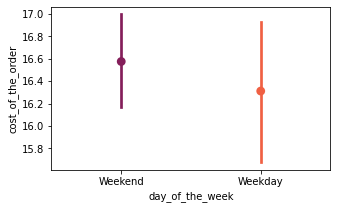

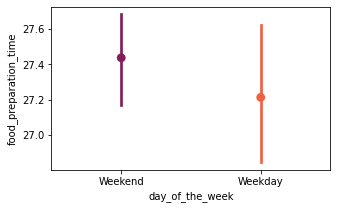

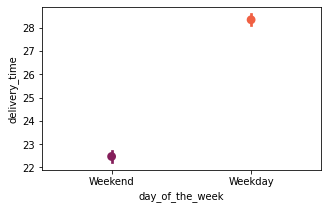

In [28]:
#Further Analysis a. 
# cost of the order, food preparation time, delivery time vs day of the week

lst = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
for i in lst:
    plt.figure(figsize=(5,3))
    sns.pointplot(data=df, x='day_of_the_week', y=i, palette = 'rocket')
    plt.show();
#From the Graphs below, 
# [Cost of order] Average cost of order on weekday is lower than weekends
# [Food preparation time] Average food preparation time for weekdays is lower than weekends
# [Delivery time] Average delivery time for weekend is lower than weekdays (big difference)

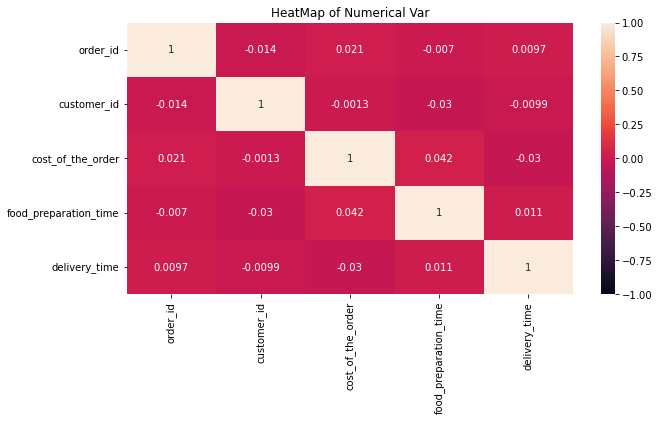

In [29]:
#Further Analysis b.

#The Correlation of variable:  order id, customer id, cost of the order, food preparation time, delivery time
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='rocket',vmin=-1,vmax=1)
plt.title("HeatMap of Numerical Var");

#It is hard to notice any high correlation between numerical variables

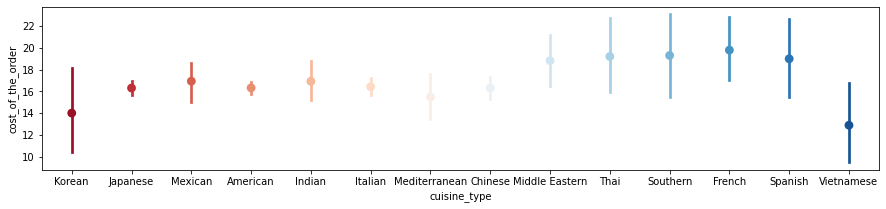

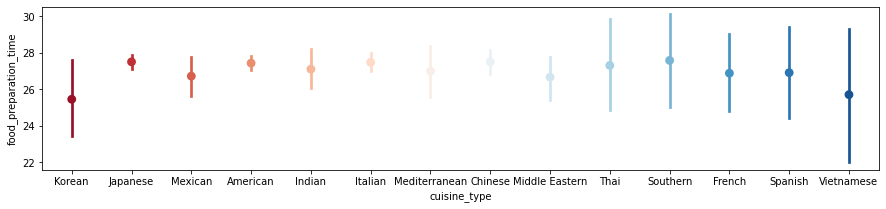

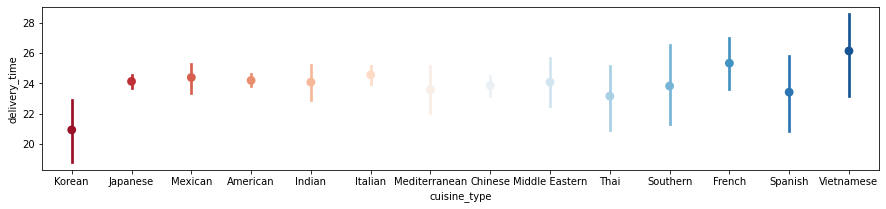

In [30]:
#Further Analysis c.
# cost of the order, food preparation time, delivery time vs cuisine type

lst = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
for i in lst:
    plt.figure(figsize=(15,3))
    sns.pointplot(data=df, x='cuisine_type', y=i, palette = 'RdBu')
    plt.show();
#From the Graphs below, 
# [Cost of order] Lowest cost of order is Vietnamese
# [Food preparation time] Mean Food preparation time for Korean and Vietnamese is the lowest
# [Delivery time] Mean delivery time for Korean cuisine is the lowest

In [31]:
#Further observations d.
#TheTop 15 restaurants with the most orders with mean delivery time, cost of order, food preparation time
count_restaurant = df.groupby(['restaurant_name'])['order_id'].count().sort_values(ascending=False).reset_index()
delivery_total = df.groupby(['restaurant_name'])['delivery_time'].mean().sort_values(ascending=False).reset_index()
cost_total = df.groupby(['restaurant_name'])['cost_of_the_order'].mean().sort_values(ascending=False).reset_index()
food_prep_total = df.groupby(['restaurant_name'])['food_preparation_time'].mean().sort_values(ascending=False).reset_index()
df_merge = pd.merge(count_restaurant, delivery_total, on = 'restaurant_name', how = 'inner')
df_merge_=pd.merge(df_merge, cost_total, on = 'restaurant_name', how='inner')
df_merge_final=pd.merge(df_merge_, food_prep_total, on = 'restaurant_name', how='inner')

df_merge_final.rename(columns={'order_id':'order_count'}, inplace=True)
df_merge_final.head(15).style.background_gradient(cmap='crest', subset = "order_count")

# Top 15 most ordered restaurants is within the mean values of delivery time, cost of the order, food preparation time. 

,restaurant_name,order_count,delivery_time,cost_of_the_order,food_preparation_time
0,Shake Shack,219,24.662100,16.344886,27.945205
1,The Meatball Shop,132,24.242424,16.251591,27.181818
2,Blue Ribbon Sushi,119,23.941176,15.999580,27.924370
3,Blue Ribbon Fried Chicken,96,24.145833,17.315521,27.197917
4,Parm,68,25.500000,16.364118,27.308824
5,RedFarm Broadway,59,23.152542,16.358136,27.593220
6,RedFarm Hudson,55,24.200000,16.749273,27.163636
7,TAO,49,23.163265,17.030612,26.775510
8,Han Dynasty,46,23.152174,16.419348,27.413043
9,Blue Ribbon Sushi Bar & Grill,44,23.409091,15.150455,26.295455


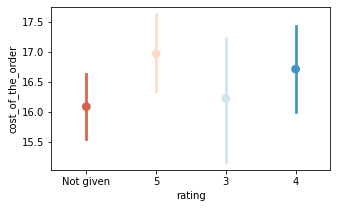

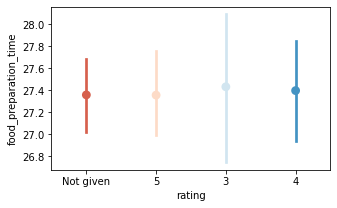

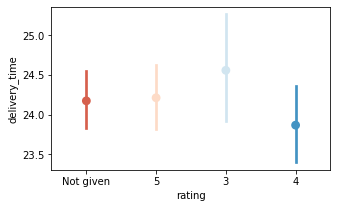

In [32]:
#Further Analysis e.
# cost of the order, food preparation time, delivery time vs rating

lst = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
for i in lst:
    plt.figure(figsize=(5,3))
    sns.pointplot(data=df, x='rating', y=i, palette = 'RdBu')
    plt.show();
#From the Graphs below, 
# [Cost of order] On average, Highest rating has the highest mean of the cost of orders
# [Food preparation time] Range has most variance for the lowest rating (rating: 3)
# [Delivery time] Average delivery time is highest for the lowest rating (rating: 3)

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [27]:
# restaurants with rating count of more than 50 
df_rating = df[df['rating'] != "Not given"].copy()
df_rating['rating'] = df_rating['rating'].astype(int)

df_rating_group = df_rating.groupby(['restaurant_name'])['rating'].count().sort_values(ascending=False).reset_index()
df_rating_count = df_rating_group[df_rating_group['rating']>50]
df_rating_count


,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64


###  The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. 

In [33]:
# Answer for Q13
# restaurants with rating count of more than 50 
df_rating = df[df['rating'] != "Not given"].copy()
df_rating['rating'] = df_rating['rating'].astype(int)

df_rating_group = df_rating.groupby(['restaurant_name'])['rating'].count().sort_values(ascending=False).reset_index()
df_rating_count = df_rating_group[df_rating_group['rating']>50]
df_rating_count

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64


#### Observations:
Net Total Revenue generated is $6,166.3

###  The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) 

In [34]:
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
percentage_60min = df[df['total_time']>60].shape[0]*100/df.shape[0]
print(round(percentage_60min, 1), "% of the orders take more than 60 minutes to be delivered")
print(100-10.5, "% of orders are delivered within a hour")

10.5 % of the orders take more than 60 minutes to be delivered
89.5 % of orders are delivered within a hour


#### Observations:
The company has 10.5% of the total orders take more than 60 minutes to get delivered from the time the order is placed and 89.5% of orders are delivered within 60 minutes.



###  The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? 

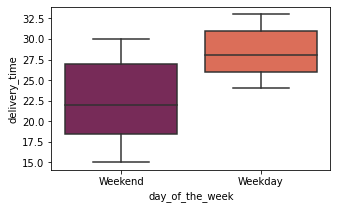

In [35]:
plt.figure(figsize=(5,3))
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time', palette = 'rocket')
plt.show();

In [36]:
print("Average delivery time on weekend orders:", round(df[df['day_of_the_week']=="Weekend"]['delivery_time'].mean(),1),"minutes")
print("Average delivery time on weekday orders:", round(df[df['day_of_the_week']=="Weekday"]['delivery_time'].mean(),1),"minutes")

Average delivery time on weekend orders: 22.5 minutes
Average delivery time on weekday orders: 28.3 minutes


#### Observations:
With respect to the results stated above

I. Orders are taking 6 minutes more usually on weekdays rather than when delivering orders on weekends.

II. The average delivery time during a weekday an order gets is greater than the mean delivery time on a weekend.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

For all the variables in the dataset

Concerning Delivery Time

The average delivery time takes more time for the lowest rating which is rating 3.

Concerning Food prepration time
The range in food preparation time has the most variance among the lowest rating that is rating 3.

Concerning Cost of order
Orders cost more than 20 dollars are 555 which is equivalent to 29.2% hence 70% of the orders that are under 20 dollars.

Orders with high ratings that is rating 5 has the highest mean of the cost of orders.

Concerning Restaurants The restaurants with rating counts than 50 & average rating greater than 4 are the following:

The Meatball Shop, Blue Ribbon Fried Chicken, Shake Shack, Blue Ribbon Sushi.

Conclusion: 4 Restautants are eligible for the promotional offer.

Concerning Food prepration time The biggest variation in food preparation time is found among the lowest rated which is rating 3.
Concerning Number of Orders Shake Shack is one of the top five restaurants ordered.

The customer who has placed the most orders on the app has done so 13 times.

Concerning Day of the week
On weekends, more customers order meals, and delivery times are on average 6 minutes faster than on weekdays.

Concerning Cuisine Type
On weekends and weekdays, the most popular food is American, Japanese followed by Italian.

The cuisine you choose is not determined by the day of the week.

Customers who use the Foodhub app love 'American' food the most.

Concerning Rating
From 1898 order using the application owned by Foodhub, there are 38% orders that are not rated.

### Recommendations:


Total Net Revenue:
Because the company's current net revenue is 6,166.3,it should provide discounts to customers who spend more than $20 in a single transaction in order to optimize profitability. The Meatball Shop, Blue Ribbon Fried Chicken, Shake Shack, and Blue Ribbon Sushi all have over 50 reviews and an average rating of 4 or above, thus the company might work with restaurants to sell packaged foods.

Ratings:
More ratings would be really beneficial to the organization. Currently, only 38% of orders are assessed using the app. It would be a win-win approach for both the corporation and the restaurant if restaurants offered events for rating orders online.

Customers and Orders:
The customer with the most orders has used the app 13 times. Planning promotions for the most popular items would increase the amount of orders, as well as lead to more loyal consumers.

Date and Time:
Additional study of the order's date and time of placement, as well as greater evaluations for each order, would provide more insight into FoodHub's business problem.